# `FLECCS` Instance

## construct model and solve

In [ ]:
from NSPLIB.src.instances.FLECCS.src.pyomo_model.model import const_model
from src.models.cz_model import CaoZavalaModel, CaoZavalaAlgo
import numpy as np
n_day = 7
week_diff = 52
sto_m = const_model(n_day=n_day, week_diff=week_diff)
m = CaoZavalaModel.from_sto_m(sto_m)
m.build()
alg = CaoZavalaAlgo(m, solver='gurobi')
alg.solve(max_iter=1e5, max_time=3600*8, tol=1e-3,ubd_midpt_fix=1,ubd_local_solve=0)
# from pyomo.environ import SolverFactory
# solver= SolverFactory('gurobi')
# solver.solve(m.origin_model,tee=True)


Solving the problem via SBB...
	Maximum iteration: 100000.0
	Maximum time: 28800
	Tolerance: 1E-03
Initialize the model...
	Root node lower bound: -582408398.91, upper bound: -89116953.73
	Total initialization CPU time: 13.87 s
Done.
Solving the model...
  iteration     CPU time    wall time  lower bound  upper bound     gap
         1        48.55        72.01   -5.2798E+08   -8.9117E+07   492.4627%


In [ ]:
m.origin_m

In [ ]:
from NSPLIB.src.instances.FLECCS.src.pyomo_model.model import const_model
from src.models.cz_model import CaoZavalaModel, CaoZavalaAlgo
import numpy as np
minimize_Ratio = np.linspace(0, 0.2, 2)
new_bound={"x_air_adsorb_max":0.7567643358197031,"x_sorbent_total":0.7571021770410511}
result_list=[]
for j in minimize_Ratio:
    n_day = 7
    week_diff = 52
    sto_m = const_model(n_day=n_day, week_diff=week_diff)
    m = CaoZavalaModel.from_sto_m(sto_m)
    m.build()
    m.update_y_bound({i: (new_bound[i] - j,new_bound[i] + j) for i in new_bound})
    alg = CaoZavalaAlgo(m, solver='gurobi')
    alg.solve(max_iter=1e5, max_time=3600*8, tol=1e-3)
    result_list.append(alg)

Building models...
Done.
Solving the problem via SBB...
	Maximum iteration: 100000.0
	Maximum time: 28800
	Tolerance: 1E-03
Initialize the model...
	Root node lower bound: -582408398.91, upper bound: -89116953.73
	Total initialization CPU time: 14.26 s
Done.
Solving the model...
  iteration     CPU time    wall time  lower bound  upper bound     gap
         1        46.51        50.59    -5.28E+08    -8.91E+07    492.9%


KeyboardInterrupt: 

In [1]:
from NSPLIB.src.instances.FLECCS.src.pyomo_model.model import const_model
from src.models.cz_model import CaoZavalaModel, CaoZavalaAlgo

n_day = 7
week_diff = 52
sto_m = const_model(n_day=n_day, week_diff=week_diff)
m = CaoZavalaModel.from_sto_m(sto_m)
m.build()
alg = CaoZavalaAlgo(m, solver='gurobi')
alg.solve(max_iter=1e5, max_time=3600*8, tol=1e-3)

Building models...
Done.
Solving the problem via SBB...
	Maximum iteration: 100000.0
	Maximum time: 28800
	Tolerance: 1E-03
Initialize the model...


AttributeError: Unknown attribute `time' for object with type <class 'pyomo.opt.results.solver.SolverInformation'>

In [ ]:
import numpy as np
minimize_Ratio = np.linspace(0, 0.2, 5)
new_bound={"x_air_adsorb_max":0.7567643358197031,"x_sorbent_total":0.7571021770410511}
for j in minimize_Ratio:
    print({i: (new_bound[i] - j,new_bound[i] + j) for i in new_bound})
    m.update_y_bound({i: (new_bound[i] - j,new_bound[i] + j) for i in new_bound})

{'x_air_adsorb_max': (0.7567643358197031, 0.7567643358197031), 'x_sorbent_total': (0.7571021770410511, 0.7571021770410511)}
{'x_air_adsorb_max': (0.7067643358197031, 0.8067643358197032), 'x_sorbent_total': (0.707102177041051, 0.8071021770410511)}
{'x_air_adsorb_max': (0.6567643358197032, 0.8567643358197031), 'x_sorbent_total': (0.6571021770410511, 0.8571021770410511)}
{'x_air_adsorb_max': (0.6067643358197031, 0.9067643358197032), 'x_sorbent_total': (0.6071021770410511, 0.9071021770410511)}
{'x_air_adsorb_max': (0.5567643358197032, 0.9567643358197031), 'x_sorbent_total': (0.5571021770410511, 0.957102177041051)}


In [ ]:
global_sol=-4.946928843629e+08
counter=0
for i in alg.res.lbds:
    if abs((i-global_sol)/global_sol)<0.01:
        counter+=1
counter/len(alg.res.lbds)

0.8461538461538461

In [ ]:
from NSPLIB.src.instances.FLECCS.src.pyomo_model.model import const_model
from src.models.cz_model import CaoZavalaModel, CaoZavalaAlgo

n_day = 7
week_diff = 52
sto_m = const_model(n_day=n_day, week_diff=week_diff)
m = CaoZavalaModel.from_sto_m(sto_m)
m.build()
from pyomo.opt import SolverFactory
solver=SolverFactory('gurobi')
solver.solve(m.origin_model, tee=True)

Building models...
Done.


Set parameter Username
Academic license - for non-commercial use only - expires 2025-07-16
skipping further warning of this kind
Read LP format model from file /var/folders/8f/7hlpwq3n64b0x53crzr0w9pc0000gn/T/tmpxdjanhck.pyomo.lp
Reading time = 0.07 seconds
x1: 49191 rows, 44619 columns, 149241 nonzeros
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.3.0 24D60)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 49191 rows, 44619 columns and 149241 nonzeros
Model fingerprint: 0x2e98a974
Variable types: 43098 continuous, 1521 integer (1521 binary)
Coefficient statistics:
  Matrix range     [1e-03, 5e+04]
  Objective range  [2e+00, 3e+08]
  Bounds range     [1e+00, 1e+02]
  RHS range        [5e+00, 5e+00]
Found heuristic solution: objective 2374296.5389
Presolve removed 28494 rows and 28468 columns
Presolve time: 0.21s
Presolved: 20697 rows, 16151 columns, 91255 nonzeros
Variable types: 14141 con

{'Problem': [{'Name': 'x1', 'Lower bound': -494692884.3629126, 'Upper bound': -494692884.3629126, 'Number of objectives': 1, 'Number of constraints': 49191, 'Number of variables': 44619, 'Number of binary variables': 1521, 'Number of integer variables': 1521, 'Number of continuous variables': 43098, 'Number of nonzeros': 149241, 'Sense': 'minimize'}], 'Solver': [{'Status': 'ok', 'Return code': '0', 'Message': 'Model was solved to optimality (subject to tolerances), and an optimal solution is available.', 'Termination condition': 'optimal', 'Termination message': 'Model was solved to optimality (subject to tolerances), and an optimal solution is available.', 'Wall time': '0.9432809352874756', 'Error rc': 0, 'Time': 1.1931829452514648}], 'Solution': [OrderedDict({'number of solutions': 0, 'number of solutions displayed': 0})]}

In [ ]:
global_sol=-4.946928843629e+08
counter=0
for i in alg.res.lbds:
    if abs((i-global_sol)/global_sol)<0.1:
        counter+=1
counter/len(alg.res.lbds)

0.9655172413793104

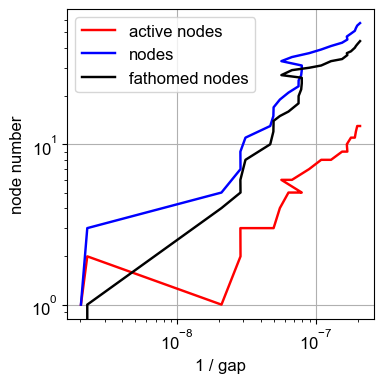

In [ ]:
alg.res.plot_bb_n_gap("loglog")

## Convergence Order Analysis

In [ ]:
from src.analyses.convergence_analysis import HausdorffAnalyzer
from src.utility.plot import plot_converge_order
from NSPLIB.src.instances.FLECCS.src.pyomo_model.model import const_model
from src.models.cz_model import CaoZavalaModel, CaoZavalaAlgo
from src.models.lagrangean_model import LagrangeanModel, LagrangeanAlgo
n_day = 7
week_diff = 52
sto_m = const_model(n_day=n_day, week_diff=week_diff)
m = LagrangeanModel.from_sto_m(sto_m)
m.build()
alg = LagrangeanAlgo(m, solver='gurobi')
ca = HausdorffAnalyzer(alg)

eps_min = -7
eps_max = 0
steps = 8

tol = 1e-9
y_val={'x_sorbent_total': 0.7571021765470505,
  'x_air_adsorb_max': 0.7567643821239471}   # first stage pt to check conv
v_val=-494692882.7371732
eps_list, distances = ca.analyze(y=y_val, y_optimal=True, v=v_val, eps_min=eps_min, eps_max=eps_max, steps=steps, tol=tol)

Building models...
Done.
Calculating the Hausdorff distances...
	diameter = 1.0E+00, distance = 5.98E+07


v:  -494692882.7371732
lbd:  -554513510.9867554


	diameter = 1.0E-01, distance = 5.98E+06


v:  -494692882.7371732
lbd:  -500674947.95610946


	diameter = 1.0E-02, distance = 5.98E+05


v:  -494692882.7371732
lbd:  -495291090.41304475


	diameter = 1.0E-03, distance = 5.98E+04


v:  -494692882.7371732
lbd:  -494752704.64391834


	diameter = 1.0E-04, distance = 5.98E+03


v:  -494692882.7371732
lbd:  -494698865.9902992


	diameter = 1.0E-05, distance = 5.99E+02


v:  -494692882.7371732
lbd:  -494693482.0698313


	diameter = 1.0E-06, distance = 6.09E+01


v:  -494692882.7371732
lbd:  -494692943.6777845


	diameter = 1.0E-07, distance = 7.10E+00
Done!


v:  -494692882.7371732
lbd:  -494692889.8385798


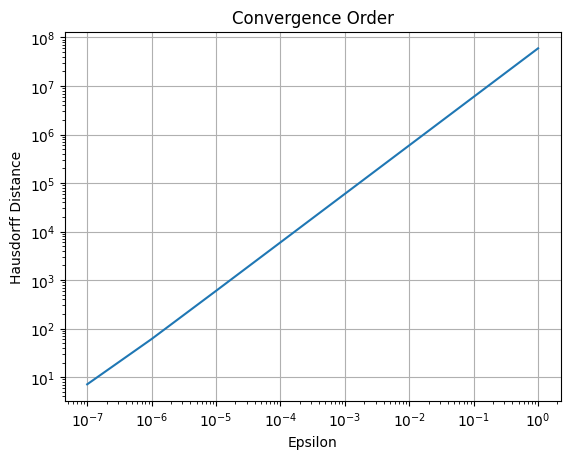

In [ ]:
import matplotlib.pyplot as plt
plt.plot(eps_list, distances)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Epsilon')
plt.ylabel('Hausdorff Distance')
plt.title('Convergence Order')
plt.grid(True)
plt.show()

# LG method

In [ ]:
from NSPLIB.src.instances.FLECCS.src.pyomo_model.model import const_model
from src.models.lagrangean_model import LagrangeanModel, LagrangeanAlgo

n_day = 7
week_diff = 52
sto_m = const_model(n_day=n_day, week_diff=week_diff)
m = LagrangeanModel.from_sto_m(sto_m)
m.build()
alg = LagrangeanAlgo(m, solver='gurobi')
alg.solve(max_iter=1e5, max_time=3600*8, tol=1e-8)

Building models...
Done.
Solving the problem via SBB...
	Maximum iteration: 100000.0
	Maximum time: 28800
	Tolerance: 1E-08
Initialize the model...
	Root node lower bound: -582408363.38, upper bound: -89116953.73
	Total initialization CPU time: 49.56 s
Done.
Solving the model...
  iteration     CPU time    wall time  lower bound  upper bound     gap
         1       461.45       512.82    -5.28E+08    -8.91E+07    492.4%
         2       881.90       962.97    -5.25E+08    -4.83E+08      8.8%
         3       987.59      1094.82    -5.13E+08    -4.83E+08      6.2%
         4      1149.68      1282.46    -5.13E+08    -4.83E+08      6.2%
         5      1637.29      1803.52    -5.10E+08    -4.83E+08      5.6%
         6      1907.02      2108.01    -4.99E+08    -4.83E+08      3.3%
         7      2270.34      2504.05    -4.98E+08    -4.83E+08      3.1%
         8      2465.91      2731.29    -4.98E+08    -4.83E+08      3.1%
         9      2580.04      2877.38    -4.96E+08    -4.83E+08  

In [ ]:
# final results
alg.res.sol

{'y': {'x_sorbent_total': 0.7571021765470505,
  'x_air_adsorb_max': 0.7567643821239471},
 'final_lbd': -494692886.4648441,
 'final_ubd': -494692882.7371732,
 'sbb_node_n': 107,
 'time': {'lbd': 6186.505575418472,
  'ubd': 918.5544309616089,
  'bt': 0.0,
  'total': 7105.060006380081}}

## bb node vs. gap plot

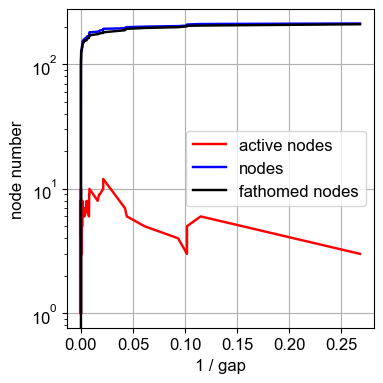

In [ ]:
alg.res.plot_bb_n_gap('semilogy')

## convergence order

### solve full model to obtain optimal y value

In [ ]:
from src.analyses.convergence_analysis import HausdorffAnalyzer
from src.utility.plot import plot_converge_order
n_day = 7
week_diff = 52
sto_m = const_model(n_day=n_day, week_diff=week_diff)
m = LagrangeanModel.from_sto_m(sto_m)
m.build()
alg = LagrangeanAlgo(m, solver='gurobi')
ca = HausdorffAnalyzer(alg)

eps_min = -7
eps_max = 0
steps = 8

tol = 1e-9
y_val={'x_sorbent_total': 0.7571021765470505,
  'x_air_adsorb_max': 0.7567643821239471}   # first stage pt to check conv
v_val=-494692882.7371732
eps_list, distances = ca.analyze(y=y_val, y_optimal=True, v=v_val, eps_min=eps_min, eps_max=eps_max, steps=steps, tol=tol)

Building models...
Done.
Calculating the Hausdorff distances...
	diameter = 1.0E+00, distance = 5.98E+07


v:  -494692882.7371732
lbd:  -554513510.9867554


	diameter = 1.0E-01, distance = 5.98E+06


v:  -494692882.7371732
lbd:  -500674947.95610946


	diameter = 1.0E-02, distance = 5.98E+05


v:  -494692882.7371732
lbd:  -495291090.41304475


KeyboardInterrupt: 

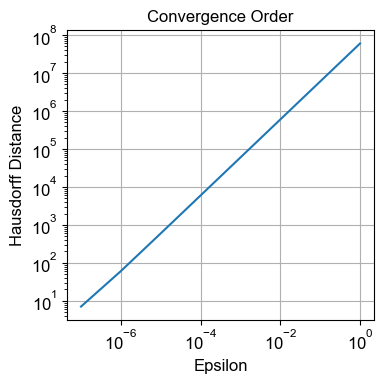

In [ ]:
plt.plot(eps_list, distances)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Epsilon')
plt.ylabel('Hausdorff Distance')
plt.title('Convergence Order')
plt.grid(True)
plt.show()

# value function visualization

In [ ]:
from src.analyses.value_function import ValueFunction
from NSPLIB.src.instances.FLECCS.src.pyomo_model.model import const_model
from src.models.lagrangean_model import LagrangeanModel, LagrangeanAlgo
from src.models.cz_model import CaoZavalaModel, CaoZavalaAlgo
n_day = 7
week_diff = 52
sto_m = const_model(n_day=n_day, week_diff=week_diff)
m = CaoZavalaModel.from_sto_m(sto_m)
m.build()
v_f = ValueFunction(m, solver='gurobi')

y_set = m.y_set.copy()
y_val = {'x_sorbent_total': 0.7571021765470505,
  'x_air_adsorb_max': 0.7567643821239471}

idx_1 = 'x_sorbent_total'
idx_2 = 'x_air_adsorb_max'

interval_1 = (0, 1)
interval_2 = (0, 1)

value_func, total_value_func,value_func_lower=v_f.calc_2D(idx_1, idx_2, y_val, interval_1=interval_1, interval_2=interval_2, step=10)

Building models...
Done.


In [ ]:
value_func[2],value_func_lower[2]

(array([[-3.54105873e+07, -3.40677372e+07, -3.27248870e+07,
         -3.13820369e+07, -3.00391867e+07, -2.86963366e+07,
         -2.73534865e+07, -2.60106363e+07, -2.46677862e+07,
         -2.33249360e+07],
        [-2.29813476e+07, -2.64001422e+07, -2.52573509e+07,
         -2.39145007e+07, -2.25716506e+07, -2.12288005e+07,
         -1.98859503e+07, -1.85431002e+07, -1.72002500e+07,
         -1.58573999e+07],
        [-1.05521078e+07, -1.47048258e+07, -1.73884677e+07,
         -1.60771477e+07, -1.47342976e+07, -1.33914474e+07,
         -1.20485973e+07, -1.07057471e+07, -9.36289700e+06,
         -8.02004695e+06],
        [ 1.87713194e+06, -2.83800640e+06, -5.55652817e+06,
         -7.85276548e+06, -6.67043185e+06, -5.32758213e+06,
         -3.98473153e+06, -2.64188223e+06, -1.29903099e+06,
          4.38190801e+04],
        [ 1.43063717e+07,  9.02932864e+06,  6.33536696e+06,
          3.40562609e+06, -5.87715108e+07, -5.74652711e+07,
         -5.61400718e+07, -5.47972217e+07, -5.345437

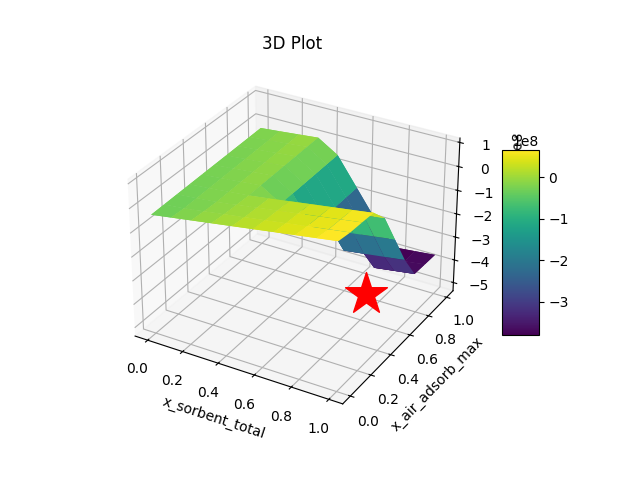

In [ ]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(v_f.y_mesh[0], v_f.y_mesh[1], v_f.value_func[2], cmap='viridis')
surf1=ax.plot_surface(v_f.y_mesh[0], v_f.y_mesh[1], value_func_lower[2], cmap='viridis')
fig.colorbar(surf,  ax=ax, shrink=0.5, aspect=5)
ax.set_xlabel("x_sorbent_total")
ax.set_ylabel("x_air_adsorb_max")
ax.set_zlabel('Z')  # Replace 'Z' with the appropriate label
ax.scatter(0.75, 0.75, -494692882.7371732, c='red', marker='*', s=1000)
plt.title('3D Plot')
plt.show()

/Users/jyang872/anaconda3/envs/pyomo/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  func(*args, **kwargs)


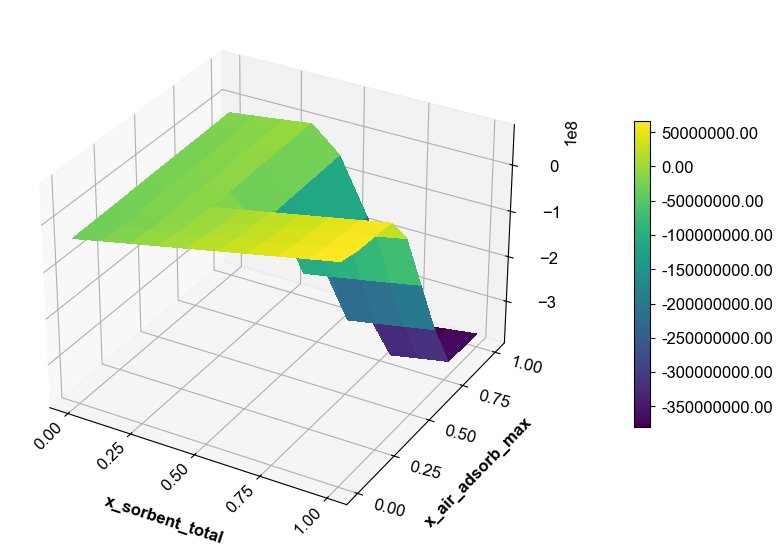

In [ ]:
v_f.plot_2D(2)